In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime

mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

print(mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples)



Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
55000 10000 5000


In [2]:
learning_rate = 0.001
epochs = 30
batch_size = 100

In [3]:
X = tf.placeholder(tf.float32, [None, 28*28])

T = tf.placeholder(tf.float32, [None, 10])

A1 = tf.reshape(X, [-1, 28, 28, 1])

In [4]:
W2 = tf.Variable(tf.random_normal([5, 5, 1, 32], stddev = 0.01))

b2 = tf.Variable(tf.constant(0.1, shape = [32]))

C2 = tf.nn.conv2d(A1, W2, strides=[1, 1, 1, 1], padding='SAME')

Z2 = tf.nn.relu(C2 + b2)

A2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
W3 = tf.Variable(tf.random_normal([4, 4, 32, 64], stddev = 0.01))

b3 = tf.Variable(tf.constant(0.1, shape = [64]))

C3 = tf.nn.conv2d(A2, W3, strides=[1, 1, 1, 1], padding='SAME')

Z3 = tf.nn.relu(C3 + b3)

A3 = tf.nn.max_pool(Z3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [6]:
W4 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev = 0.01))

b4 = tf.Variable(tf.constant(0.1, shape = [128]))

C4 = tf.nn.conv2d(A3, W4, strides=[1, 1, 1, 1], padding='SAME')

A4 = tf.nn.relu(C4 + b4)

In [7]:
A4_flat = tf.reshape(A4, [-1,7*7*128])

In [8]:
W5 = tf.Variable(tf.random_normal([7*7*128, 10], stddev = 0.01))

b5 = tf.Variable(tf.random_normal([10]))

Z5 = tf.matmul(A4_flat, W5) + b5

y = A5 = tf.nn.softmax(Z5)

In [9]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = y, labels = T))

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

In [10]:
predicted_val = tf.equal(tf.argmax(y, 1), tf.argmax(T, 1))

accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype = tf.float32))

accuracy_index = tf.cast(predicted_val, dtype = tf.float32)

predicted_list = tf.argmax(y, 1)

In [11]:
saver = tf.train.Saver()
save_file = './CNN6_model.ckpt'

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    start_time = datetime.now()
    
    for i in range(epochs):
        
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for step in range(total_batch):
            
            batch_x_data , batch_t_data = mnist.train.next_batch(batch_size)
            
            loss_val, _ = sess.run([loss, train], feed_dict = {X : batch_x_data, T : batch_t_data})
            
            if step % 100 == 0:
                
                print("epochs = ", i, ", step = ", step , ", loss_val = ", loss_val)
    
    end_time = datetime.now()
    
    saver.save(sess, save_file)
    
    print("")
    print("elapsed time = ", end_time - start_time)

epochs =  0 , step =  0 , loss_val =  2.3061237
epochs =  0 , step =  100 , loss_val =  1.6516583
epochs =  0 , step =  200 , loss_val =  1.6317537
epochs =  0 , step =  300 , loss_val =  1.6041816
epochs =  0 , step =  400 , loss_val =  1.6008117
epochs =  0 , step =  500 , loss_val =  1.6425458
epochs =  1 , step =  0 , loss_val =  1.6012282
epochs =  1 , step =  100 , loss_val =  1.6052368
epochs =  1 , step =  200 , loss_val =  1.600975
epochs =  1 , step =  300 , loss_val =  1.6072191
epochs =  1 , step =  400 , loss_val =  1.5954813
epochs =  1 , step =  500 , loss_val =  1.502746
epochs =  2 , step =  0 , loss_val =  1.5717179
epochs =  2 , step =  100 , loss_val =  1.4839779
epochs =  2 , step =  200 , loss_val =  1.4994644
epochs =  2 , step =  300 , loss_val =  1.4738759
epochs =  2 , step =  400 , loss_val =  1.472788
epochs =  2 , step =  500 , loss_val =  1.477113
epochs =  3 , step =  0 , loss_val =  1.4715064
epochs =  3 , step =  100 , loss_val =  1.4792022
epochs =  3 

epochs =  27 , step =  200 , loss_val =  1.4663755
epochs =  27 , step =  300 , loss_val =  1.461752
epochs =  27 , step =  400 , loss_val =  1.4611504
epochs =  27 , step =  500 , loss_val =  1.4621627
epochs =  28 , step =  0 , loss_val =  1.4611505
epochs =  28 , step =  100 , loss_val =  1.4612842
epochs =  28 , step =  200 , loss_val =  1.4611505
epochs =  28 , step =  300 , loss_val =  1.4611505
epochs =  28 , step =  400 , loss_val =  1.4711505
epochs =  28 , step =  500 , loss_val =  1.4711504
epochs =  29 , step =  0 , loss_val =  1.4611502
epochs =  29 , step =  100 , loss_val =  1.4811434
epochs =  29 , step =  200 , loss_val =  1.4611505
epochs =  29 , step =  300 , loss_val =  1.4611505
epochs =  29 , step =  400 , loss_val =  1.4711175
epochs =  29 , step =  500 , loss_val =  1.4611502

elapsed time =  0:44:20.826416


In [14]:
index_label_prediction_list = []
with tf.Session() as sess:
    saver.restore(sess, save_file)
    
    test_x_data = mnist.test.images
    test_t_data = mnist.test.labels
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict = {X:test_x_data, T:test_t_data})
    print("\nAccuracy = ", accuracy_val)
    print("type(accuracy_val) = ", type(accuracy_val), ', type(predicted_list_val) = ', type(predicted_list_val), ', type(index_label) = ', type(index_label))
    print("index_label.shape = ", index_label.shape)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
        
    # numpy type 으로 디버그
    temp_list = [] 
    
    for index in range(len(index_label)):
        
        if index_label[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_prediction_list.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list", len(index_label_prediction_list))

INFO:tensorflow:Restoring parameters from ./CNN6_model.ckpt

Accuracy =  0.9901
type(accuracy_val) =  <class 'numpy.float32'> , type(predicted_list_val) =  <class 'numpy.ndarray'> , type(index_label) =  <class 'numpy.ndarray'>
index_label.shape =  (10000,)
length of index_label_list =  10000
false label count =  99

length of index_label_false_list 99


In [15]:
print(index_label_prediction_list)

[[8, 5, 6], [321, 2, 7], [324, 0, 6], [326, 2, 1], [449, 3, 5], [582, 8, 2], [646, 2, 4], [720, 5, 8], [740, 4, 9], [883, 3, 5], [938, 3, 5], [947, 8, 9], [965, 6, 0], [1014, 6, 8], [1039, 7, 1], [1114, 3, 8], [1226, 7, 2], [1232, 9, 4], [1247, 9, 5], [1260, 7, 1], [1527, 1, 5], [1530, 8, 7], [1581, 7, 9], [1621, 0, 6], [1681, 3, 7], [1709, 9, 5], [1878, 8, 3], [1901, 9, 4], [1911, 5, 0], [2018, 1, 2], [2109, 3, 8], [2130, 4, 9], [2135, 6, 1], [2148, 4, 9], [2182, 1, 2], [2293, 9, 4], [2387, 9, 1], [2447, 4, 9], [2582, 9, 7], [2597, 5, 3], [2654, 6, 1], [2836, 4, 2], [2921, 3, 2], [2939, 9, 5], [2953, 3, 5], [2959, 2, 3], [2972, 0, 6], [2995, 6, 8], [3073, 1, 2], [3225, 7, 9], [3288, 4, 9], [3384, 2, 6], [3451, 7, 9], [3503, 9, 1], [3558, 5, 0], [3662, 8, 0], [3727, 8, 9], [3806, 5, 8], [3808, 7, 8], [3818, 0, 6], [3869, 9, 4], [3918, 5, 9], [3976, 7, 1], [4151, 7, 9], [4176, 2, 7], [4224, 9, 7], [4238, 7, 3], [4256, 3, 0], [4284, 9, 5], [4369, 9, 4], [4443, 3, 2], [4500, 9, 1], [4639,

10 image is saved now
20 image is saved now
30 image is saved now
40 image is saved now
50 image is saved now
60 image is saved now
70 image is saved now
80 image is saved now
90 image is saved now
Elapsed save time =>  0:00:24.004307
Total  99  data is saved


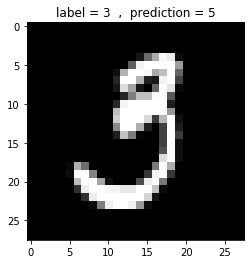

In [17]:
import os
import matplotlib.pyplot as plt

%matplotlib inline

save_count = 0

curr_dir = os.getcwd()

now = datetime.now()
algorithm_name = 'CNN_6conv_Adam'
dir_name = algorithm_name + str(now.year) + '-' + str(now.month) + '-' + str(now.day) + '-' + str(now.hour) + '-' + str(now.minute) + '-' + str(now.second) 

os.mkdir(dir_name)

os.chdir(dir_name)

start_time = datetime.now()

for list_data in index_label_prediction_list:
    
    index_int = list_data[0]
    label_int = list_data[1]
    prediction_int = list_data[2]
        
    # 저장할 이미지를 인덱스를 이용하여 가져옴
    img = test_x_data[index_int].reshape(28,28)  
    plt.imshow(img, cmap='gray')
    
    # 정답 문자열
    label_str = str(label_int)
    
    # 예측값 문자열
    prediction_str = str(prediction_int)
    
    # 정답과 오답을 나타내는 문자열
    label_prediction_str = 'label = ' + label_str + '  ,  prediction = ' + prediction_str
    
    # 저장 파일 이름 생성, str(index_int).png
    save_image_name = str(index_int) + '.png'
    
    plt.title(label_prediction_str)
    plt.savefig(save_image_name)
    
    save_count += 1
    
    if save_count % 10 == 0:
        
        print(save_count, 'image is saved now')

    
end_time = datetime.now()

print('Elapsed save time => ', end_time - start_time)
print('Total ', save_count, " data is saved")

# 원래의 dir 로 복귀
os.chdir(curr_dir)